<h1> Loading Data

In [32]:
# Load the dataset 
import pandas as pd
dataset = pd.read_csv("datasets/news-article-categories.csv")
dataset.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [33]:
dataset["title"].iloc[2291]

'Top 5 Ways To Get Ready For Fall Semester'

In [34]:
dataset["content"] = dataset["title"] + ". " + dataset["body"]
# Select the content column to analyze
datacol = "content"

In [35]:
# View 10 most common words prior to text pre-processing
freq = pd.Series(' '.join(map(str, dataset[datacol])).split()).value_counts()[:10]
freq

the     199391
to      121278
of      110757
and     107750
a        97283
in       75171
that     53247
is       40350
for      38892
on       33240
dtype: int64

In [36]:
# View 10 least common words prior to text pre-processing
freq1 =  pd.Series(' '.join(map(str,dataset[datacol])).split()).value_counts()[-10:]
freq1

“Kameron    1
Shanda      1
Madera      1
Ince.       1
“held       1
“Y’all      1
KENS5.      1
lady.”      1
Manhunt     1
goes...     1
dtype: int64

<h1> Stopwords

In [37]:
import re
import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download("stopwords")
# nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [38]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [39]:
# Load a set of custom stop words from a text file (one stopword per line)
csw = set(line.strip() for line in open('datasets/custom-stopwords.txt'))
csw = [sw.lower() for sw in csw]
print(sorted(csw))

['', 'also', 'com', 'even', 'like', 'many', 'would']


In [40]:
# Combine custom stop words with stop_words list
stop_words = stop_words.union(csw)
print(sorted(stop_words))

['', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'com', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'even', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'like', 'll', 'm', 'ma', 'many', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should

<h1> Clean Corpus

In [41]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    
    # Removing verbs
    list_of_verbs = []
    pos_tagged_tokens = nltk.pos_tag(text)

    for i in range(len(pos_tagged_tokens)):
        if pos_tagged_tokens[i][1].startswith('V'):
            list_of_verbs.append(pos_tagged_tokens[i][0])

    text = [word for word in text if not word in list_of_verbs]

    text = " ".join(text)
    corpus.append(text)

In [42]:
# #List of verbs
# list_of_verbs = []

# for doc in corpus:
#   tokens = nltk.word_tokenize(doc)
#   pos_tagged_tokens = nltk.pos_tag(tokens)

#   for i in range(len(pos_tagged_tokens)):
#     if pos_tagged_tokens[i][1].startswith('V'):
#       if not pos_tagged_tokens[i][0] in list_of_verbs:
#         list_of_verbs.append(pos_tagged_tokens[i][0])

# print(list_of_verbs)

In [43]:
#View sample pre-processed corpus item
corpus[10]

'mystery novelist sue grafton dead sue grafton millhone alphabet mystery series thursday santa barbara california battle cancer daughter writer facebook page friday grafton millhone book title letter alphabet alibi back series end yesterday final installment z zero originally publication far family alphabet end grafton daughter jamie clark author adamant book screen ghostwritten daughter series unlikely neat finale grafton family time death clark mother health rapidly week two year battle unspecified type cancer daughter crime novelist c w grafton sue grafton kentucky appeared work city current mayor greg fischer note grafton death social medium friday n citizen friend neighbor master gardener hometown hero world great talent prolific author sue grafton citizen friend neighbor master gardener hometown hero legacy live word entertain thrill generation pic twitter lc xlxnjip millhone series center around private detective name fictional town santa teresa california series one constant tu

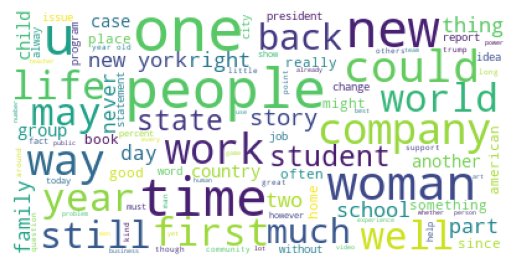

In [44]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordcloud.png", dpi=900)

In [45]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [46]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['agency',
 'sexual',
 'predator',
 'year',
 'former',
 'agent',
 'october',
 'carolyn',
 'phone',
 'model']

<h1> N-grams

In [47]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    
    return words_freq[:n]


In [48]:
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Keyword", "Frequency"]
print(top_df)

    Keyword  Frequency
0       one      12053
1      year      11299
2    people      10299
3      time      10076
4       new       9276
5     woman       9250
6    school       7880
7     state       5654
8       way       5564
9     first       5517
10    world       5097
11      day       5021
12     life       5010
13    could       4796
14  student       4783
15  company       4757
16      two       4739
17     work       4725
18    right       4325
19    thing       4311


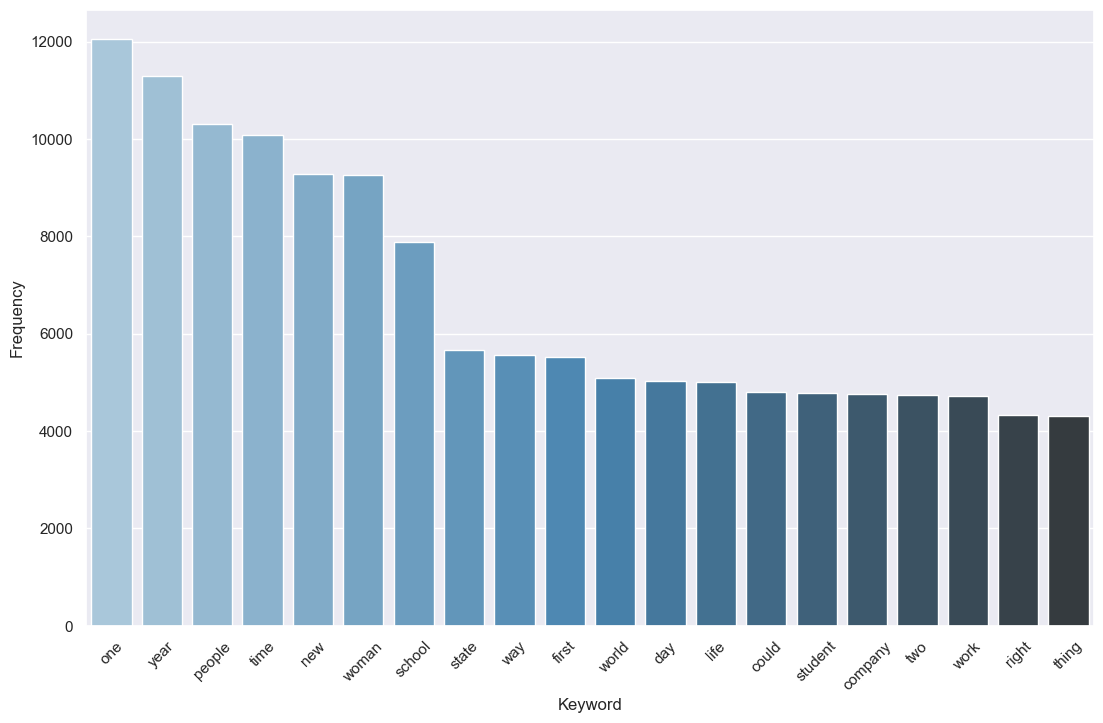

In [50]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig("_keyword.png", bbox_inches = "tight")

In [51]:
# View most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    
    return words_freq[:n]

In [52]:
# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

              Bi-gram  Frequency
0            new york       2673
1            year old       1543
2         pic twitter       1157
3           last year       1145
4         high school        985
5         white house        909
6       social medium        808
7        united state        790
8           last week        771
9        donald trump        731
10  sexual harassment        717
11           year ago        698
12   president donald        667
13          york time        662
14     sexual assault        654
15      public school        594
16         last month        525
17          york city        506
18            http co        491
19     climate change        491


NameError: name 'file_prefix' is not defined

In [ ]:
# View most frequently occuring tri-grams
def get_top_n3_words(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec2.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec2.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    
    return words_freq[:n]

                       Tri-gram  Frequency
0                 new york time        648
1                 new york city        488
2        president donald trump        314
3        president barack obama        122
4     sexual harassment assault        106
5           high school student         91
6           wall street journal         90
7   correction previous version         89
8                  world war ii         88
9      huffpost request comment         80
10       special counsel robert         78
11  immediately request comment         77
12    michigan state university         77
13       counsel robert mueller         76
14             los angeles time         74
15       previous version story         74
16          affordable care act         69
17            black life matter         68
18      respond request comment         68
19               new york state         66


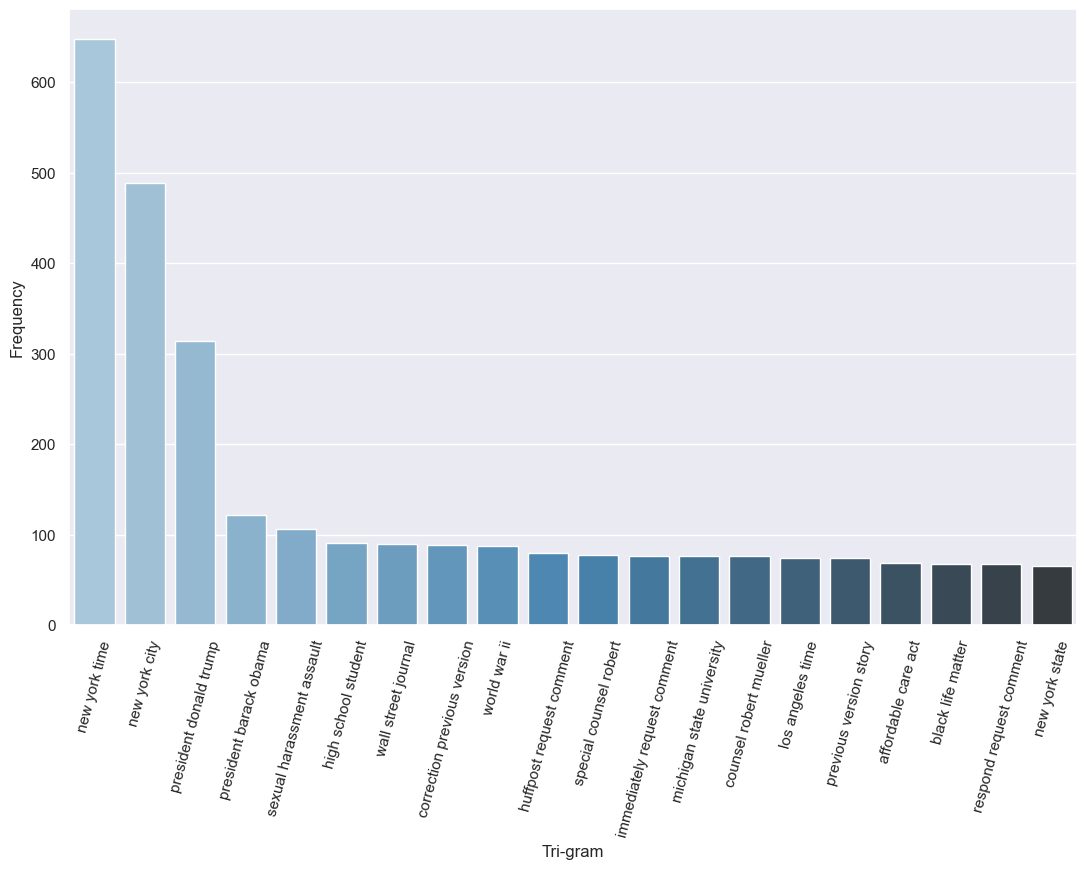

In [ ]:
# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig(file_prefix + "_tri-gram.png", bbox_inches = "tight")

<h1> TF-IDF

In [60]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
from sklearn.feature_extraction.text import TfidfTransformer 

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[2291]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

c:\Users\julie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse= True)

def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
top way ready fall semester summer college student across america new semester stress course schedule dorm arrangement textbook cost worthwhile breather remind big picture goal college student list semester open mind easier today world internet age consume news source u comfortable espouse world perspective deem faulty logic belief college campus ought opportunity wide variety background instead seek others whose life experience completely different truly open thought opinion may mind key issue well person explain behind others quality employer every field well prepared future always important feature american democracy connection mentor chance seek new people wide expertise school professor mentor particular field academic range share real world workplace experience may interest skill discovering professor help new world challenge idea certain career push past limit connection invaluable chart academic path school track graduate someone trust bounce idea graduate school ent

<h1> TF-IDF Performance

In [62]:
text1 = "DUBLIN — Lawmakers elected Leo Varadkar as Ireland’s prime minister for a second time Saturday in agreed succession to Micheál Martin as the government partners vowed to defend the center ground of Irish politics against the nationalists of Sinn Féin. “The distinguishing feature of centrist democrats is the ability to respect differences, find points of agreement, and cooperate. This is what we have done,” Martin said as he backed Varadkar’s nomination as Taoiseach, a core commitment in their coalition pact struck in 2020. Under terms of that agreement, the nearly century-old rivals of Irish politics — Martin’s Fianna Fáil and Varadkar’s Fine Gael – formed their first joint government with support from a junior coalition partner, the Green Party. All three agreed that Martin would lead for the first 2 ½ years, Varadkar for the rest of an expected five-year administration."

In [63]:
text2 = "When two major political parties came together after Ireland's election in 2020, they agreed to share the role of taoiseach, or prime minister. After two-and-a-half years, Micheal Martin steps down and Varadkar returns.Leo Varadkar returned as taoiseach, or prime minister, of Ireland on Saturday, replacing Micheal Martin as part of an unconventional coalition deal struck more than two years ago. Varadkar's nomination was approved by lawmakers during a special session of the Dail, the lower house of parliament. Varadkar later received the seal of office from President Michael D. Higgins."

In [64]:
text3 = "Actor Kevin Spacey is to be charged with seven further sex offences in the UK, in addition to those he is already due to stand trial for in June next year.All the charges relate to one man. Britain's Crown Prosecution said that charges against the former House of Cards star are three of indecent assault, three of sexual assault and one of causing a person to engage in sexual activity without consent. The charges relate to incidents between 2001 and 2004. "

In [65]:
text4 = "In October, Kevin Spacey testified in a New York court where he faced a civil trial related to sexual-assault allegations levied against him by the actor Anthony Rapp. In 2017, Rapp alleged that Spacey — who was starring in Netflix’s House of Cards at the time — had sexually assaulted him when he was 14. Since then, over 30 men have come forward with accusations ranging from nonconsensual groping to the attempted rape of minors. Spacey, 62, initially responded to Rapp’s allegations with a muddled apology note in which he came out as gay (a deflection many criticized as conflating homosexuality and pedophilia) and claimed not to remember the incident, writing on Twitter, “If I did behave then as he describes, I owe him the sincerest apology for what would have been deeply inappropriate drunken behavior, and I am sorry for the feelings he describes having carried with him all these years.” Following the initial wave of allegations, Spacey was dropped by his talent agency and publicist, fired from House of Cards, and scrubbed from film projects. He retreated from public life, with a representative telling Variety he was seeking “evaluation and treatment,” though he has occasionally resurfaced over the years to launch film comebacks and post bizarre defenses on YouTube and Twitter."

In [66]:
article_test2 = ["The exhibition brings together around one hundred works, among them never-before-seen paintings and drawings by Monet, Sisley, Pissarro and Renoir, as well as books of colours, fabric swatches, Japanese prints, archive documents and a host of family photographs. The dynamic portrait that Claude Monet painted of his older brother in 1874, a vibrant illustration of the brothers\’ deeply affectionate bond, is also presented for the very first time. Curator Lefebvre spent nearly two years tracking it down. Painted in 1874, the year of Claude\’s first show and Leon\’s debut as an industrialist in Rouen, it depicts a well-off man in a black suit and top hat (see above). According to the family, the portrait was initially painted outdoors with the intention of finishing it at Monet\’s atelier. But visiting Renoir and Sisley advised their friend to leave it as is. Leon Monet didn\’t agree and hid the painting until his death."]

In [67]:
article_test1 = ["The collapse of Silicon Valley Bank (SVB), the biggest bank failure since 2008, has sparked alarm across the world as governments try to assess its impact on tech start-ups, other financial institutions and even pension funds. On Monday, US president Joe Biden assured Americans the nation\’s banking system was safe, telling them: \“Your deposits will be there when you need them\". US regulators announced steps on Sunday to protect customers and prevent more bank runs after they seized and shut down another struggling lender, crypto-friendly Signature Bank. While SVB was the go-to lender for Silicon Valley venture capitalists and tech firms, including Etsy and Roblox, it also helped fund companies on the other side of the Atlantic, leaving them scrambling to figure out how to access their deposits and manage their finances"]

In [68]:
# Fetch document for which keywords needs to be extracted
doc=text4
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
In October, Kevin Spacey testified in a New York court where he faced a civil trial related to sexual-assault allegations levied against him by the actor Anthony Rapp. In 2017, Rapp alleged that Spacey — who was starring in Netflix’s House of Cards at the time — had sexually assaulted him when he was 14. Since then, over 30 men have come forward with accusations ranging from nonconsensual groping to the attempted rape of minors. Spacey, 62, initially responded to Rapp’s allegations with a muddled apology note in which he came out as gay (a deflection many criticized as conflating homosexuality and pedophilia) and claimed not to remember the incident, writing on Twitter, “If I did behave then as he describes, I owe him the sincerest apology for what would have been deeply inappropriate drunken behavior, and I am sorry for the feelings he describes having carried with him all these years.” Following the initial wave of allegations, Spacey was dropped by his talent agency and p

In [69]:
text_list = [text1, text2, text3, text4, article_test1, article_test2]

In [70]:
# Pre-process dataset to get a cleaned and normalised text corpus
clean_text_list = []

for doc in text_list:
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(doc))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 

    # Removing verbs
    list_of_verbs = []
    pos_tagged_tokens = nltk.pos_tag(text)

    for i in range(len(pos_tagged_tokens)):
        if pos_tagged_tokens[i][1].startswith('V'):
            list_of_verbs.append(pos_tagged_tokens[i][0])

    text = [word for word in text if not word in list_of_verbs]

    text = " ".join(text)
    clean_text_list.append(text)

In [81]:
clean_text_list[4]

'collapse silicon valley bank svb biggest bank failure since alarm across world government ass impact tech start ups financial institution pension fund monday u president joe biden american nation banking system safe deposit need u regulator step sunday customer prevent bank shut another lender crypto friendly signature bank svb lender silicon valley venture capitalist tech firm etsy roblox fund company side atlantic scrambling figure access deposit manage finance'

In [83]:
# Fetch document for which keywords needs to be extracted
doc = clean_text_list[5]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
exhibition together around one hundred work among never monet sisley pissarro renoir well book colour fabric swatch japanese print archive document host family photograph dynamic portrait claude monet older brother vibrant illustration brother deeply affectionate bond first time curator nearly two year tracking year claude first show debut industrialist rouen well man black suit top hat family portrait initially outdoors intention monet atelier renoir sisley friend monet agree hid death

Keywords:
portrait 0.311
brother 0.259
outdoors 0.206
nearly two 0.197
vibrant 0.186


In [73]:
type(corpus)

list

In [75]:
with open("datasets/cleaned_corpus.txt", "w") as f:
    for doc in corpus:
        f.write(doc +"\n")

In [76]:
liste_test = []

In [79]:
with open("datasets/cleaned_corpus.txt", "r") as f:
  for line in f:
    liste_test.append(line.strip())

In [80]:
liste_test[10]

'mystery novelist sue grafton dead sue grafton millhone alphabet mystery series thursday santa barbara california battle cancer daughter writer facebook page friday grafton millhone book title letter alphabet alibi back series end yesterday final installment z zero originally publication far family alphabet end grafton daughter jamie clark author adamant book screen ghostwritten daughter series unlikely neat finale grafton family time death clark mother health rapidly week two year battle unspecified type cancer daughter crime novelist c w grafton sue grafton kentucky appeared work city current mayor greg fischer note grafton death social medium friday n citizen friend neighbor master gardener hometown hero world great talent prolific author sue grafton citizen friend neighbor master gardener hometown hero legacy live word entertain thrill generation pic twitter lc xlxnjip millhone series center around private detective name fictional town santa teresa california series one constant tu